Index number : 190026T

Name         : AHAMED M.I.I

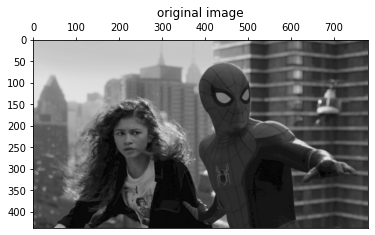

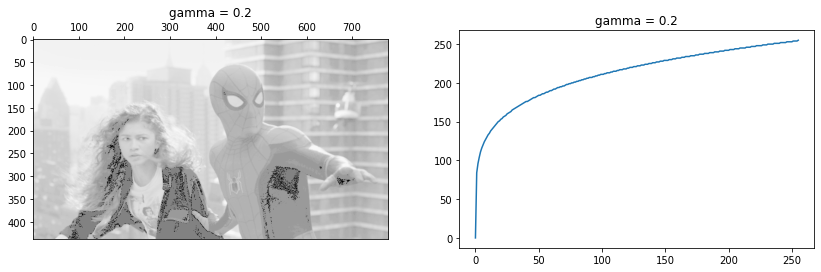

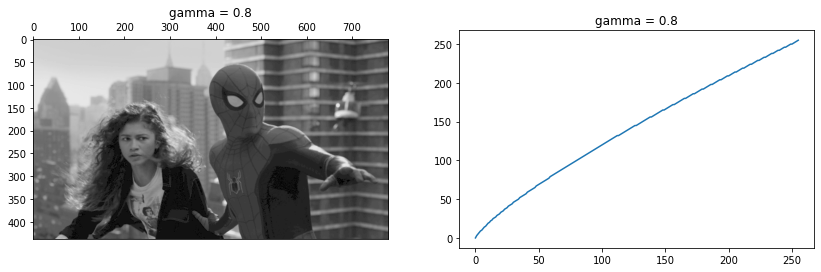

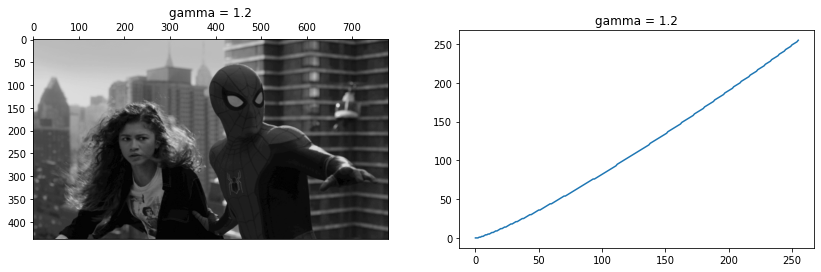

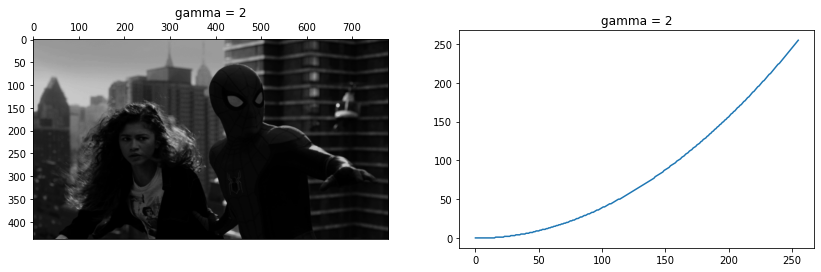

In [29]:
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gamma = [0.2 ,0.8, 1.2, 2]

im = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_02\spider.png', cv.IMREAD_GRAYSCALE)
assert im is not None

fig, ax = plt.subplots()
ax.imshow(im, cmap = 'gray', vmin =0, vmax=255)
ax.title.set_text('original image')
ax.xaxis.tick_top()
ax.xaxis.tick_top()

for g in gamma:
    correction = np.array([(pixel/255)**g*255 for pixel in range(0, 256)]).astype(np.uint8)
    corrected = cv.LUT(im, correction)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
    ax1.imshow(corrected, cmap = 'gray', vmin =0, vmax=255)
    ax1.title.set_text('gamma = ' + str(g))
    ax1.xaxis.tick_top()
    ax1.xaxis.tick_top()

    ax2.plot(correction)
    ax2.title.set_text('gamma = ' + str(g))



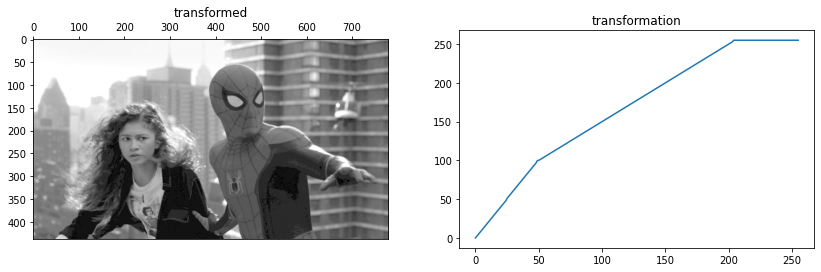

In [35]:
#2)
transformation_1 = np.linspace(0,100,50)
transformation_2 = np.linspace(100,255,155)
transformation_3 = np.ones(51)*255
transformation = np.concatenate([transformation_1, transformation_2], axis=0)
transformation = np.concatenate([transformation, transformation_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(im, transformation)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.title.set_text('transformed')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.title.set_text('transformation')

(array([17814.,   506.,     0.,  1750.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  9441.,     0.,  1642.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 16457.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 10381.,     0.,     0.,  2945.,
            0.,     0.,     0.,     0.,     0.,     0.,  6149.,  1038.,
            0.,     0.,     0.,     0.,  4566.,   961.,     0.,     0.,
            0.,     0.,  4562.,     0.,     0.,  2446.,     0.,     0.,
         2641.,     0.,     0.,     0.,     0.,     0.,  5860.,     0.,
         1861.,     0.,     0.,     0.,     0.,  3850.,     0.,  2016.,
            0.,     0.,     0.,     0.,  4290.,     0.,     0.,  3081.,
            0.,     0.,     0.,     0.,     0.,     0.,  6031.,     0.,
            0.,  2830.,     0.,     0.,     0.,     0.,  4868., 

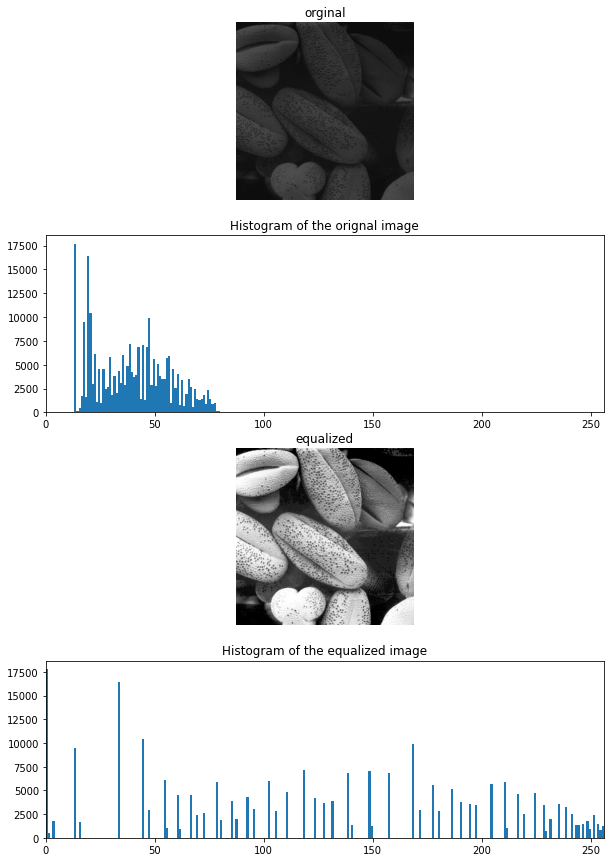

In [59]:
#3)
shell = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_02\shells.tif', cv.IMREAD_GRAYSCALE)
assert shell is not None

fig, ax = plt.subplots(4, figsize=(10,15))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(shell, cmap = 'gray', vmin =0, vmax=255)

#a)
ax[1].set_xlim([0, 256])
ax[1].title.set_text('Histogram of the orignal image')
ax[1].hist(shell.flatten(), 256, [0, 256])

#b)
equalized = cv.equalizeHist(shell)
ax[2].axis('off')
ax[2].title.set_text('equalized')
ax[2].imshow(equalized, cmap = 'gray', vmin =0, vmax=255)

#c)
ax[3].set_xlim([0, 256])
ax[3].title.set_text('Histogram of the equalized image')
ax[3].hist(equalized.flatten(), 256, [0, 256])




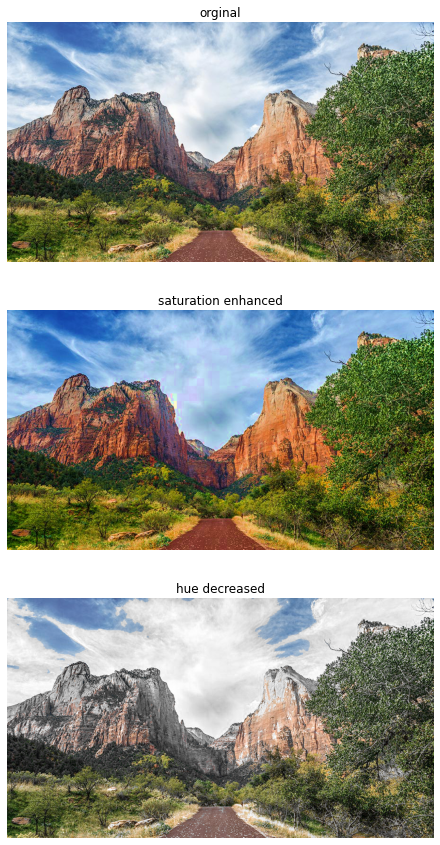

In [67]:
#4)
zion = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\exercises\exercise_02\zion_pass.jpg', cv.IMREAD_COLOR)
zion = cv.cvtColor(zion, cv.COLOR_BGR2RGB)
assert shell is not None

fig, ax = plt.subplots(3, figsize=(10,15))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(zion)

#a)
saturation_add = 50
hsv = cv.cvtColor(zion, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

lim = 255 - saturation_add
s[s > lim] = 255
s[s <= lim] += saturation_add

final_hsv = cv.merge((h, s, v))
saturation_enhanced = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)

ax[1].axis('off')
ax[1].title.set_text('saturation enhanced')
ax[1].imshow(saturation_enhanced, cmap = 'gray', vmin =0, vmax=255)

#b)
hue_substract = 50
hsv = cv.cvtColor(zion, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

lim = hue_substract
s[s > lim] -=  hue_substract
s[s <= lim] = 0

final_hsv = cv.merge((h, s, v))
hue_decreased = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)

ax[2].axis('off')
ax[2].title.set_text('hue decreased')
ax[2].imshow(hue_decreased, cmap = 'gray', vmin =0, vmax=255)

